In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns',None)

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(59598, 24)
(14900, 24)


In [4]:
employee_df = pd.concat([train_df,test_df], ignore_index=True)

In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

In [6]:
categorical_columns = employee_df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(categorical_columns))


Categorical columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


In [7]:
employee_df.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,No,37,Bachelor’s Degree,Married,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,Yes,75,High School,Divorced,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,No,5,Master’s Degree,Married,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,Yes,39,High School,Married,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,Yes,57,PhD,Single,4,Entry,Large,45,No,No,Yes,Good,Low,Left


In [8]:
employee_df.to_csv("EmployeeAttrition.csv")

In [9]:
employee_df= employee_df.sort_values(by= ["Employee ID"], ascending= True).reset_index(drop= True)
employee_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,1,56,Male,41,Education,5209,Fair,Very High,Average,0,No,98,Associate Degree,Married,0,Entry,Small,86,No,No,No,Good,Low,Stayed
1,2,46,Female,22,Technology,9099,Fair,Medium,Average,0,No,13,Bachelor’s Degree,Married,0,Entry,Medium,93,No,No,No,Good,High,Left
2,3,32,Male,16,Education,4239,Good,High,Below Average,0,No,54,High School,Single,0,Mid,Small,56,No,No,No,Poor,Low,Stayed
3,4,25,Female,17,Finance,6834,Fair,High,Average,0,Yes,62,PhD,Single,2,Entry,Medium,26,No,No,No,Poor,High,Left
4,5,38,Female,2,Finance,12176,Fair,Very High,Below Average,0,No,75,Bachelor’s Degree,Married,5,Entry,Small,66,No,No,No,Good,Medium,Left


In [10]:
employee_df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832935,49.991584,1.650326,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995289,28.513611,1.553633,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


### Gender Distribution of Employees

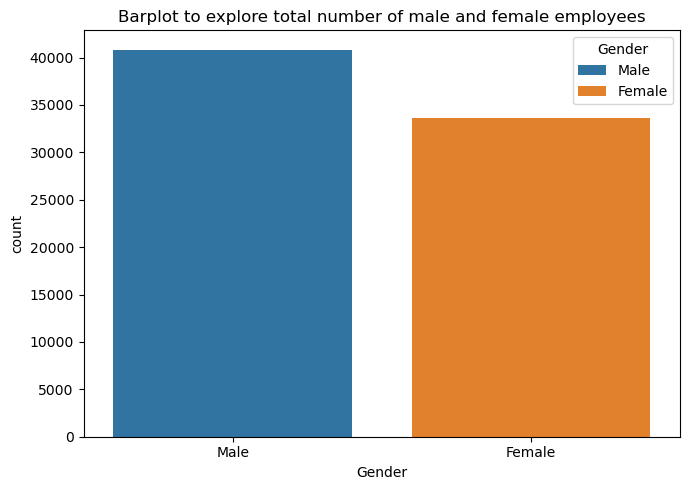

In [11]:
gender_df = employee_df["Gender"].value_counts().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data= gender_df, x= "Gender", y= "count", hue="Gender", legend=True)
plt.title("Barplot to explore total number of male and female employees")
plt.tight_layout()
plt.show()

This shows company has higher number of male than female. 

In [49]:

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Gender'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')

Gender     Female   Male
Attrition               
Left        17850  17520
Stayed      15822  23306
Chi-Squared Statistics: 754.0995584972316
p value: 5.1524427303371715e-166
Degree of freedom: 1
Expected Frequencies:
[[15986.71964348 19383.28035652]
 [17685.28035652 21442.71964348]]


If we are considering 5\% of level of significance, 

With CHI-Square test we can conclude that gender and attrition are dependent to each other. 

### Age Distribution of Employee

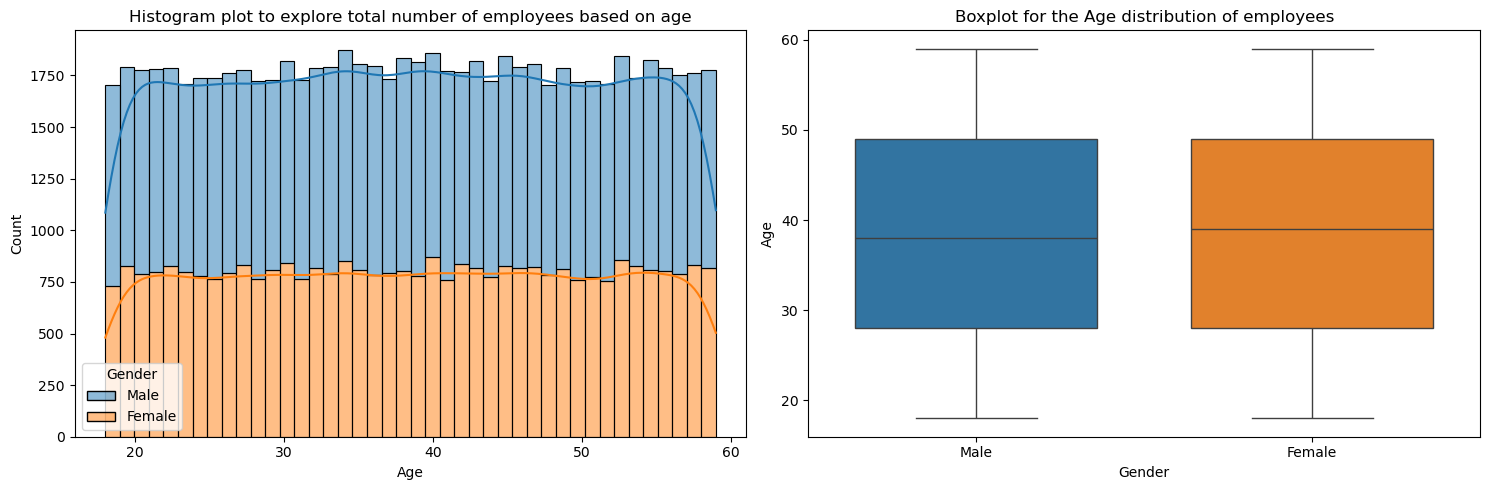

In [12]:
fig, axs= plt.subplots(1, 2, figsize= (15, 5))
sns.histplot(data= employee_df, x= "Age", hue= "Gender", kde= True, legend= True,  multiple="stack", ax= axs[0])
axs[0].set_title("Histogram plot to explore total number of employees based on age")

sns.boxplot(data= employee_df, x= "Gender", hue="Gender", y= "Age", gap=0.1, ax= axs[1])
axs[1].set_title("Boxplot for the Age distribution of employees")
plt.tight_layout()
plt.show()


All agees have almost equal number of employees. 

In [64]:
from statsmodels.stats.weightstats import ztest

z_stat, p_value = ztest(employee_df[employee_df['Attrition'] == "Stayed"]['Age'].values, employee_df[employee_df['Attrition'] == "Left"]['Age'].values)
print(f"Z-stat value: {z_stat}\n")
print(f"p-value: {p_value}")


Z-stat value: 13.883535423892779

p-value: 7.971309621509336e-44


P-value is less than 0.05, Attrition is dependent on age. 

### Years at Company

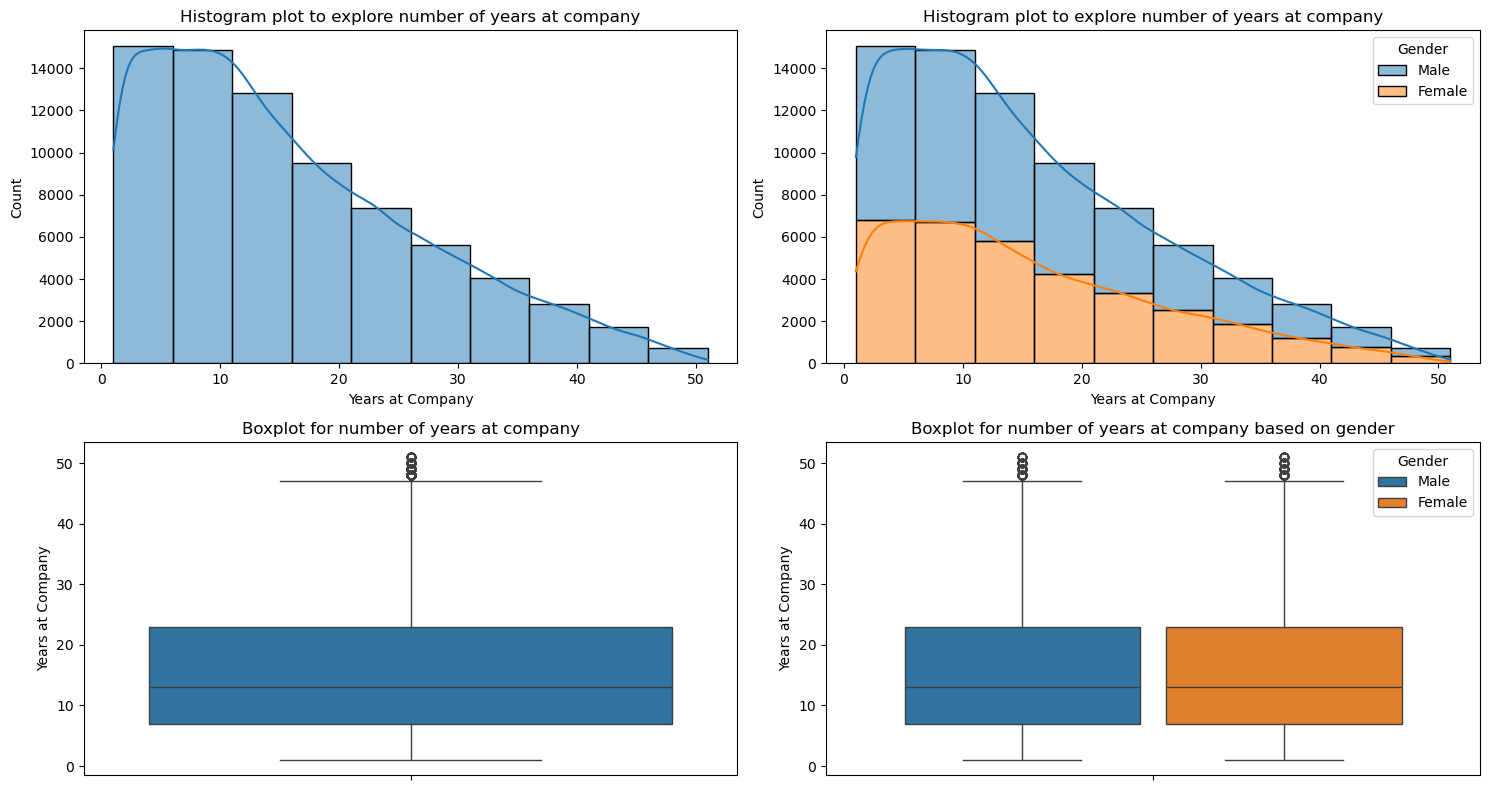

In [13]:
fig, axs= plt.subplots(2, 2, figsize= (15, 8))
sns.histplot(data= employee_df, x= "Years at Company", bins= 10, kde= True, legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Histogram plot to explore number of years at company")
sns.histplot(data= employee_df, x= "Years at Company", bins= 10, hue= "Gender", kde= True, legend= True,  multiple="stack", ax= axs[0, 1])
axs[0, 1].set_title("Histogram plot to explore number of years at company")

sns.boxplot(data= employee_df, y= "Years at Company", ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for number of years at company")
sns.boxplot(data= employee_df, hue="Gender", y= "Years at Company", gap=0.1, ax= axs[1, 1])
axs[1, 1].set_title("Boxplot for number of years at company based on gender")

plt.tight_layout()
plt.show()


It seems there is outlier for number of years at company for both male and female records. 
It shows some of employes works for larger number of years at the company. 

In [70]:
z_stat, p_value = ztest(employee_df[employee_df['Attrition'] == "Stayed"]['Years at Company'].values, employee_df[employee_df['Attrition'] == "Left"]['Years at Company'].values)
print(f"Z-stat value: {z_stat}\n")
print(f"p-value: {p_value}")

Z-stat value: 17.885327148511198

p-value: 1.534498963853218e-71


**Years at Company** is significant for determining Attrition.

### Job Role

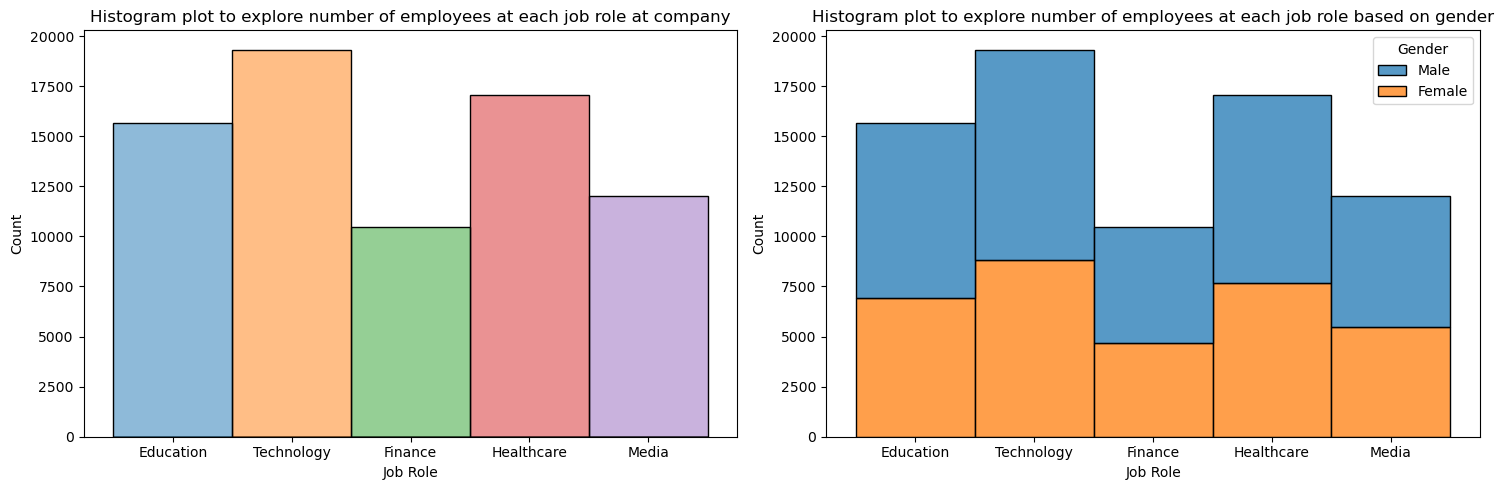

In [14]:
fig, axs= plt.subplots(1, 2, figsize= (15, 5))
sns.histplot(data= employee_df, x= "Job Role", hue= "Job Role", kde= True, legend= False, ax= axs[0])
axs[0].set_title("Histogram plot to explore number of employees at each job role at company")
sns.histplot(data= employee_df, x= "Job Role", hue= "Gender", ax= axs[1], multiple= "stack")
axs[1].set_title("Histogram plot to explore number of employees at each job role based on gender")

plt.tight_layout()
plt.show()

Technology has highest number of employee and finance has lowest number of employees. 

In [71]:
## Chi-square test for Attrition and Job Role as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Job Role'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')

Job Role   Education  Finance  Healthcare  Media  Technology
Attrition                                                   
Left            7636     4903        8112   5620        9099
Stayed          8022     5545        8962   6376       10223
Chi-Squared Statistics: 14.777672160140254
p value: 0.00518526517306511
Degree of freedom: 4
Expected Frequencies:
[[ 7434.0715187   4960.47893903  8106.35694918  5695.43504524
   9173.65754785]
 [ 8223.9284813   5487.52106097  8967.64305082  6300.56495476
  10148.34245215]]


We are considering 0.05 of level of significance. 
While calculating p-value from chi-square test it is found that calculated p-value > level of significance.

This concludes that Job Role has no significant on determining attrition. 

### Monthly Income

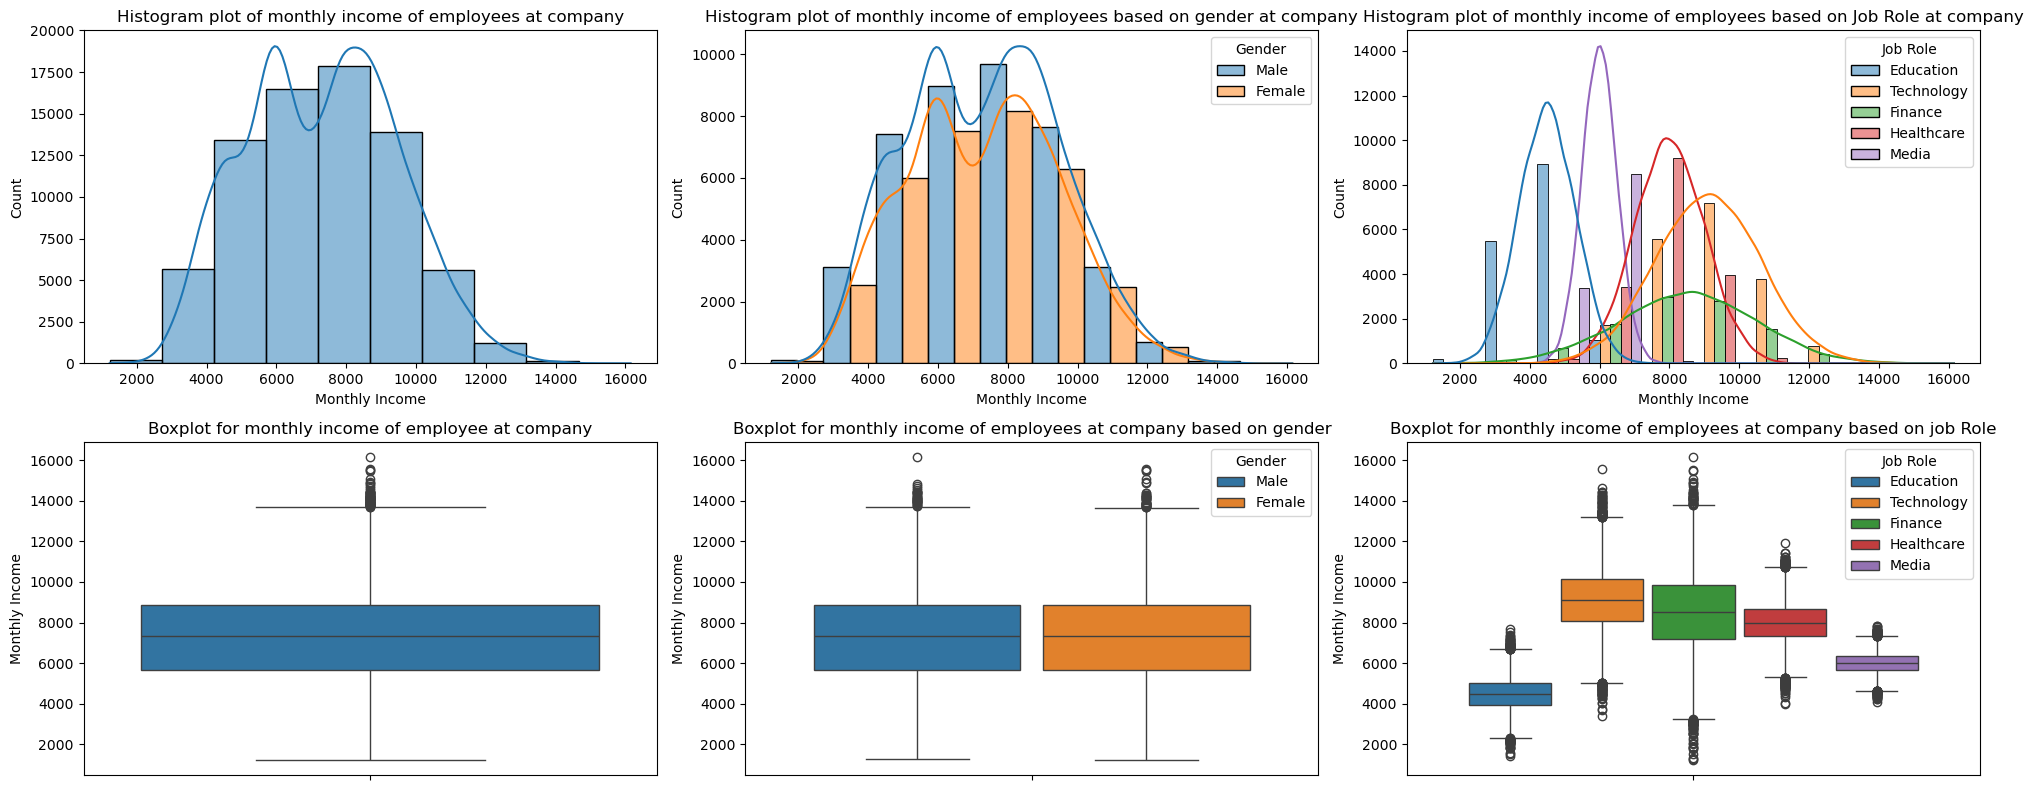

In [15]:
fig, axs= plt.subplots(2, 3, figsize= (20, 8))
sns.histplot(data= employee_df, x= "Monthly Income", bins= 10, kde= True, legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Histogram plot of monthly income of employees at company")
sns.histplot(data= employee_df, x= "Monthly Income", bins= 10, hue= "Gender",multiple="dodge", kde= True, legend= True, ax= axs[0, 1])
axs[0, 1].set_title("Histogram plot of monthly income of employees based on gender at company")
sns.histplot(data= employee_df, x= "Monthly Income", bins= 10, hue= "Job Role", kde= True, multiple="dodge", legend= True, ax= axs[0, 2])
axs[0, 2].set_title("Histogram plot of monthly income of employees based on Job Role at company")

sns.boxplot(data= employee_df, y= "Monthly Income", ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for monthly income of employee at company")
sns.boxplot(data= employee_df, hue="Gender", y= "Monthly Income", gap=0.1, ax= axs[1, 1])
axs[1, 1].set_title("Boxplot for monthly income of employees at company based on gender")
sns.boxplot(data= employee_df, hue="Job Role", y= "Monthly Income", gap=0.1, ax= axs[1, 2])
axs[1, 2].set_title("Boxplot for monthly income of employees at company based on job Role")

plt.tight_layout()
plt.show()


Most of the employees have the monthly salary of around 8000. While looking at the box plot, there are few employees with outlier level of salary. It shows, normally male employees have higher salaries. And, finance department has higher variations in the salary range. 

In [75]:
z_stat, p_value = ztest(employee_df[employee_df['Attrition'] == "Stayed"]['Monthly Income'].values, employee_df[employee_df['Attrition'] == "Left"]['Monthly Income'].values)
print(f"Z-stat value: {z_stat}\n")
print(f"p-value: {p_value}")


Z-stat value: 2.917154422900773

p-value: 0.003532408396224888


Z-test: Here p-value is < 0.05 (Level of significance) Hence, Monthly Income is significant to determine Attrition.

### Work-Life Balance

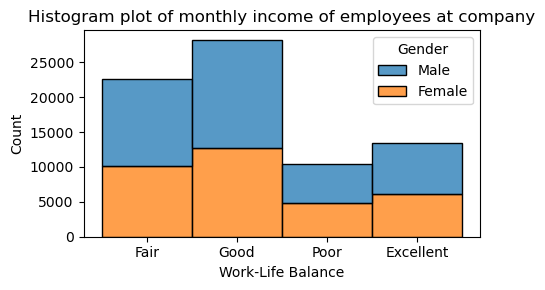

In [16]:
plt.figure(figsize= (5, 3))
sns.histplot(data= employee_df, x= "Work-Life Balance", bins= 10,hue="Gender", multiple="stack", legend= True)
plt.title("Histogram plot of monthly income of employees at company")
plt.tight_layout()
plt.show()


In [77]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Work-Life Balance'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')

Work-Life Balance  Excellent   Fair   Good  Poor
Attrition                                       
Left                    4789  12967  11368  6246
Stayed                  8643   9562  16790  4133
Chi-Squared Statistics: 2912.497416218848
p value: 0.0
Degree of freedom: 3
Expected Frequencies:
[[ 6377.21603265 10696.27010121 13368.79459851  4927.71926763]
 [ 7054.78396735 11832.72989879 14789.20540149  5451.28073237]]


Work-life Balance and Attrition are associated with each other.

### Job Satisfaction

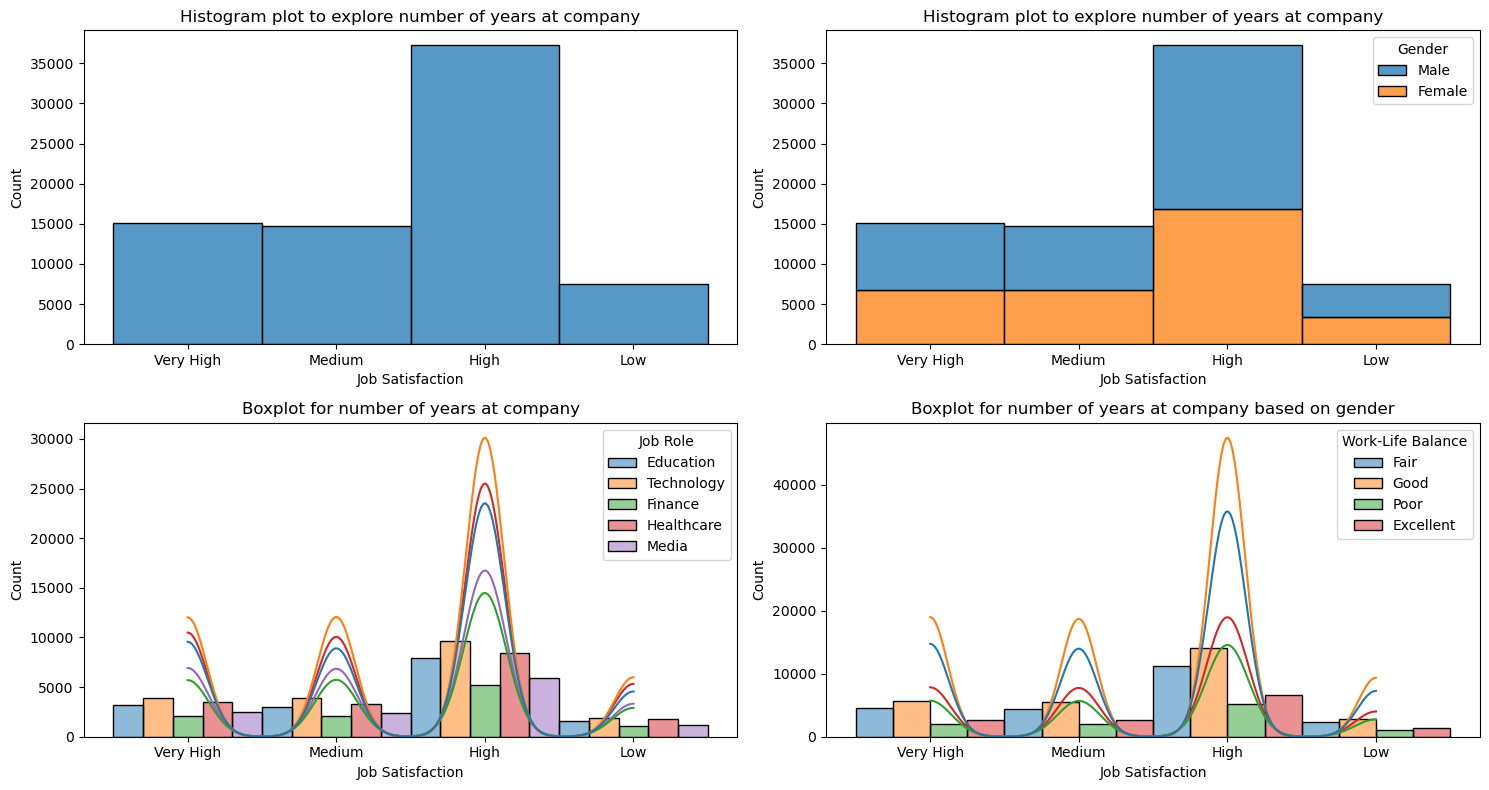

In [17]:
fig, axs= plt.subplots(2, 2, figsize= (15, 8))

sns.histplot(data= employee_df, x= "Job Satisfaction", legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Histogram plot to explore number of years at company")
sns.histplot(data= employee_df, x= "Job Satisfaction", bins= 10, hue= "Gender",legend= True,  multiple="stack", ax= axs[0, 1])
axs[0, 1].set_title("Histogram plot to explore number of years at company")
sns.histplot(data= employee_df, x= "Job Satisfaction", hue= "Job Role", multiple="dodge", kde=True, ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for number of years at company")
sns.histplot(data= employee_df, x= "Job Satisfaction", hue= "Work-Life Balance", multiple="dodge", kde=True, ax= axs[1, 1])
axs[1, 1].set_title("Boxplot for number of years at company based on gender")

plt.tight_layout()
plt.show()


In [79]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Job Satisfaction'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')

Job Satisfaction   High   Low  Medium  Very High
Attrition                                       
Left              16759  3936    6679       7996
Stayed            20486  3521    8038       7083
Chi-Squared Statistics: 388.2372896703481
p value: 7.815319543548032e-84
Degree of freedom: 3
Expected Frequencies:
[[17683.10088861  3540.41840049  6987.30556525  7159.17514564]
 [19561.89911139  3916.58159951  7729.69443475  7919.82485436]]


Job Satisfaction is significance on determining the Attrition

### Performance Rating  

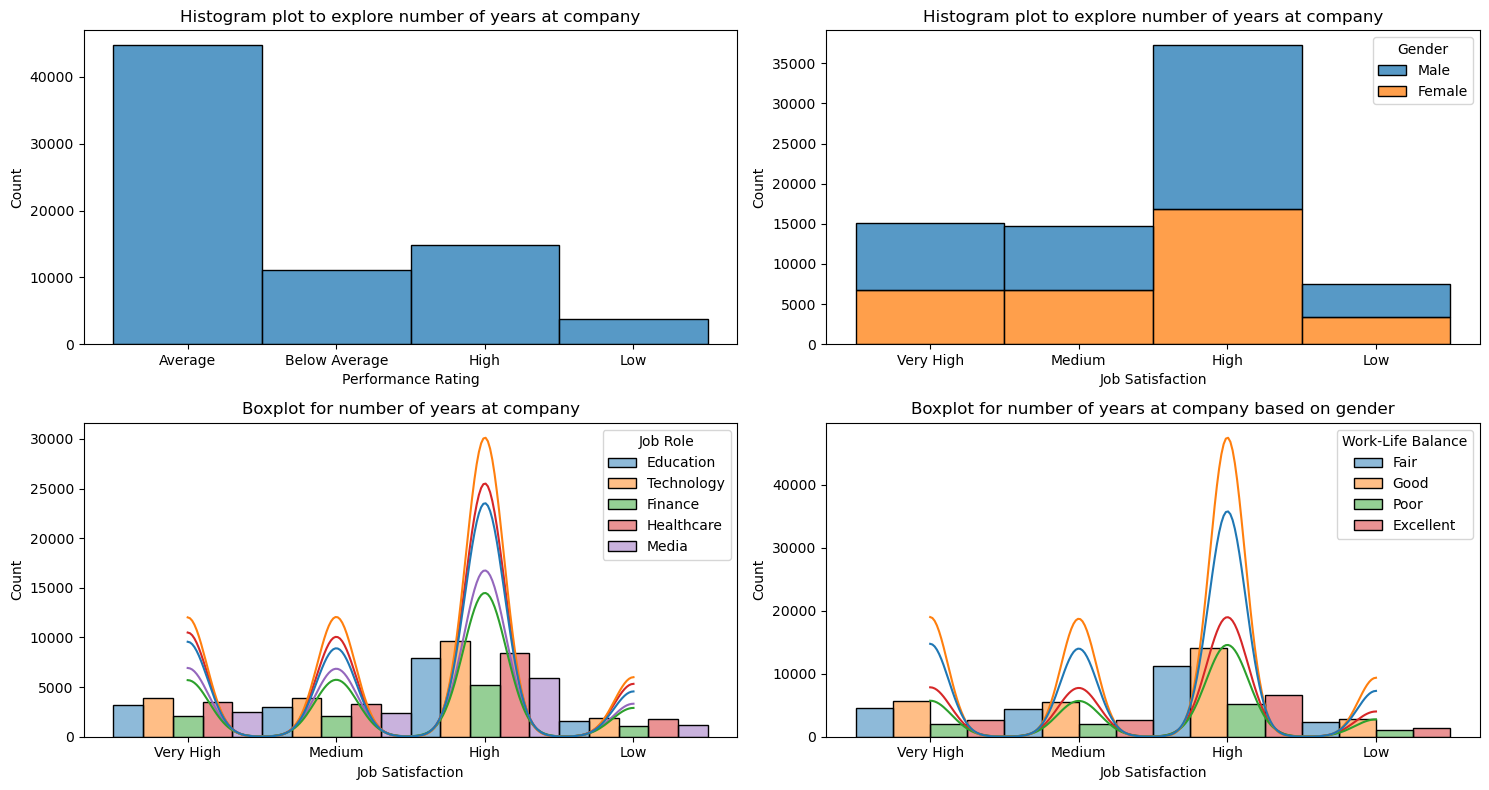

In [18]:
fig, axs= plt.subplots(2, 2, figsize= (15, 8))
sns.histplot(data= employee_df, x= "Performance Rating", legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Histogram plot to explore number of years at company")
sns.histplot(data= employee_df, x= "Job Satisfaction", bins= 10, hue= "Gender",legend= True,  multiple="stack", ax= axs[0, 1])
axs[0, 1].set_title("Histogram plot to explore number of years at company")
sns.histplot(data= employee_df, x= "Job Satisfaction", hue= "Job Role", multiple="dodge", kde=True, ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for number of years at company")
sns.histplot(data= employee_df, x= "Job Satisfaction", hue= "Work-Life Balance", multiple="dodge", kde=True, ax= axs[1, 1])
axs[1, 1].set_title("Boxplot for number of years at company based on gender")

plt.tight_layout()
plt.show()


In [80]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Performance Rating'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')

Performance Rating  Average  Below Average  High   Low
Attrition                                             
Left                  20607           5746  6889  2128
Stayed                24112           5393  8021  1602
Chi-Squared Statistics: 257.1070725696427
p value: 1.8992627373037496e-55
Degree of freedom: 3
Expected Frequencies:
[[21231.5905125   5288.55043088  7078.9376896   1770.92136702]
 [23487.4094875   5850.44956912  7831.0623104   1959.07863298]]


Performance rating is signifiant.

### Number of Promotions 

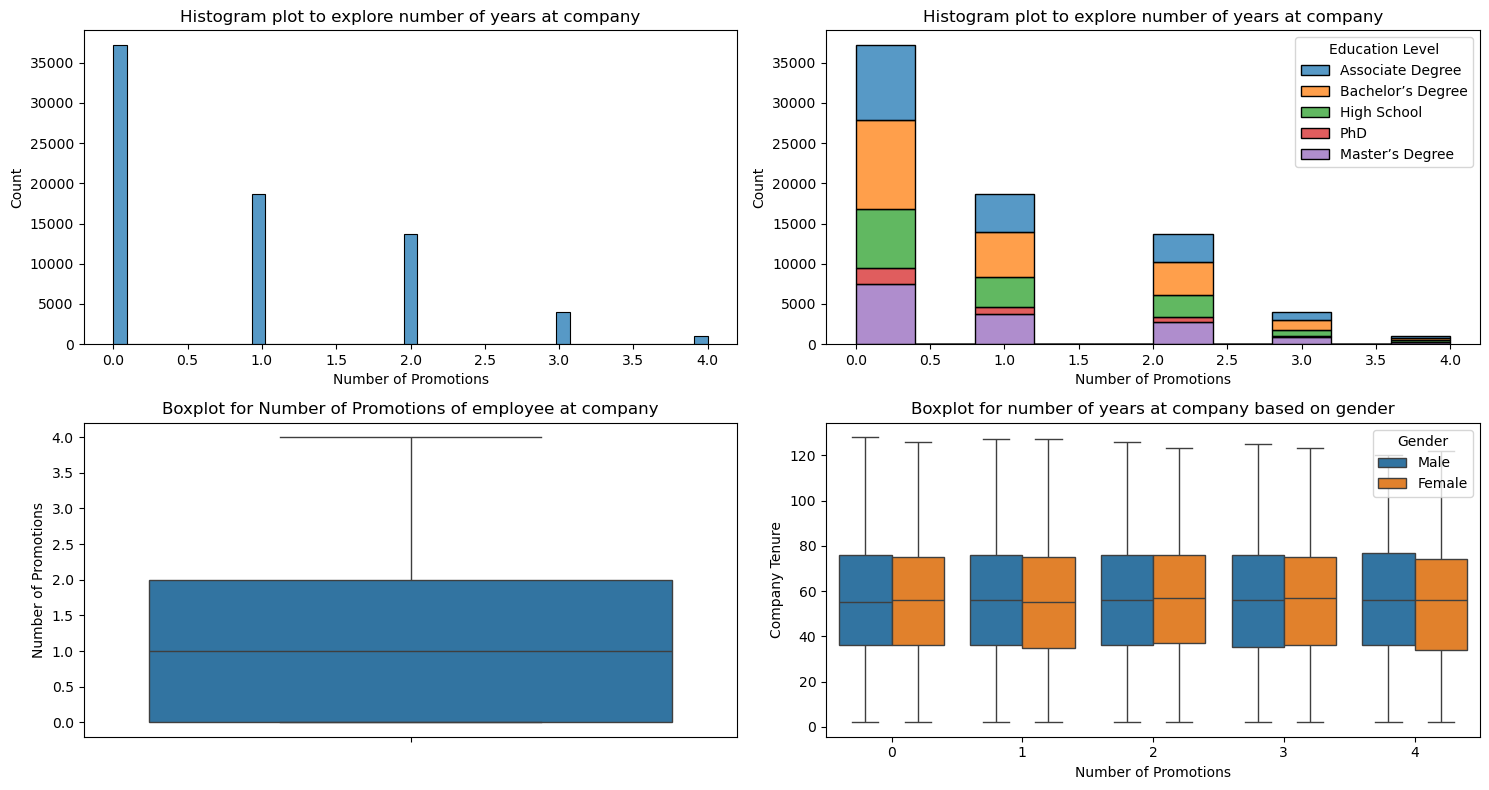

In [19]:
fig, axs= plt.subplots(2, 2, figsize= (15, 8))
sns.histplot(data= employee_df, x= "Number of Promotions", legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Histogram plot to explore number of years at company")
sns.histplot(data= employee_df, x= "Number of Promotions", bins= 10, hue= "Education Level",legend= True,  multiple="stack", ax= axs[0, 1])
axs[0, 1].set_title("Histogram plot to explore number of years at company")

sns.boxplot(data= employee_df, y= "Number of Promotions", ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for Number of Promotions of employee at company")

sns.boxplot(data= employee_df, x= "Number of Promotions", y= "Company Tenure", hue="Gender", ax= axs[1, 1])
axs[1, 1].set_title("Boxplot for number of years at company based on gender")

plt.tight_layout()
plt.show()


In [81]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Number of Promotions'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')

Number of Promotions      0     1     2     3    4
Attrition                                         
Left                  18304  9147  6679  1010  230
Stayed                18841  9534  6955  3039  759
Chi-Squared Statistics: 1134.3931162422791
p value: 2.6556036207363545e-244
Degree of freedom: 4
Expected Frequencies:
[[17635.62310398  8869.32494832  6473.12115761  1922.37550001
    469.55529007]
 [19509.37689602  9811.67505168  7160.87884239  2126.62449999
    519.44470993]]


Number of promotion is significance. 

### Overtime    

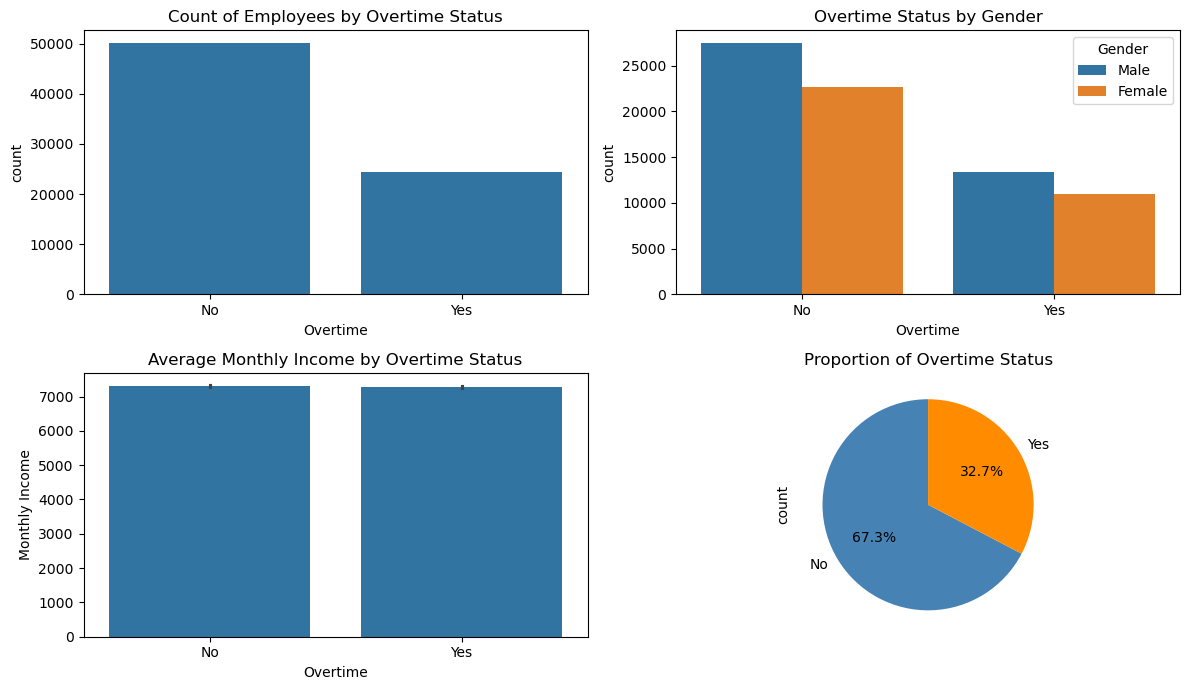

In [20]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))
sns.countplot(data=employee_df, x="Overtime", ax=axs[0,0])
axs[0, 0].set_title("Count of Employees by Overtime Status")

sns.countplot(data=employee_df, x="Overtime", hue="Gender", ax=axs[0, 1])
axs[0, 1].set_title("Overtime Status by Gender")

sns.barplot(data=employee_df, x="Overtime", y="Monthly Income", estimator=np.mean, ax=axs[1,0])
axs[1, 0].set_title("Average Monthly Income by Overtime Status")

employee_df['Overtime'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['steelblue', 'darkorange'], ax=axs[1,1])
axs[1,1].set_title("Proportion of Overtime Status")

plt.tight_layout()
plt.show()


In [82]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Overtime'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')

Overtime      No    Yes
Attrition              
Left       22836  12534
Stayed     27321  11807
Chi-Squared Statistics: 233.54481272983026
p value: 1.0053172789509483e-52
Degree of freedom: 1
Expected Frequencies:
[[23813.43244114 11556.56755886]
 [26343.56755886 12784.43244114]]


Overtime is signifiance for attrition

### Distance from Home 

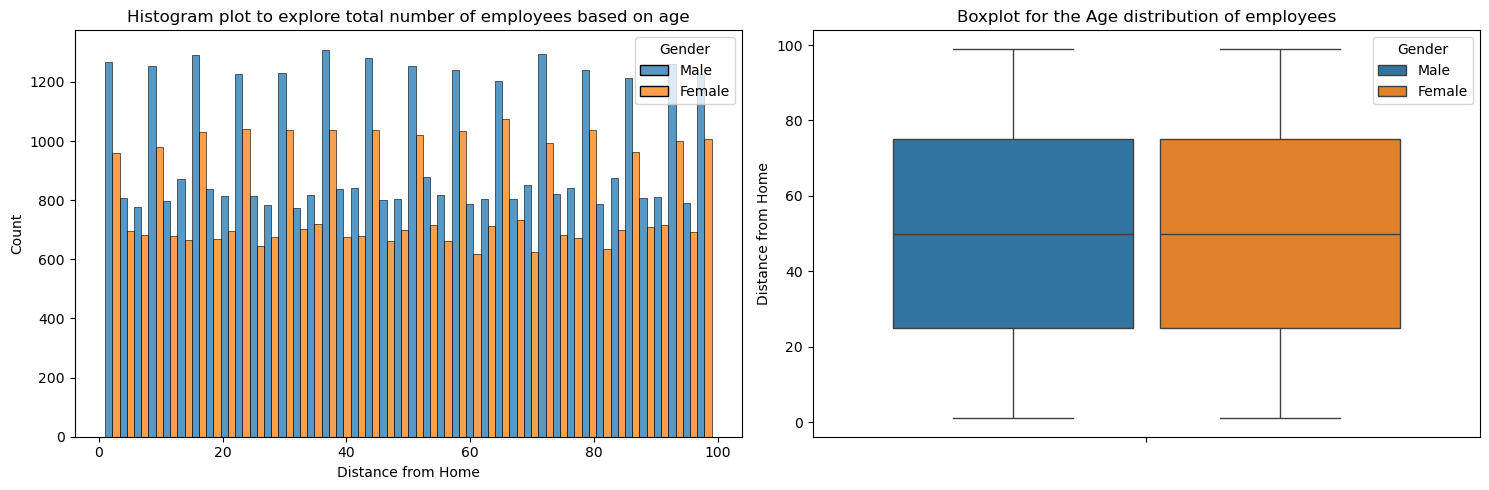

In [21]:
fig, axs= plt.subplots(1, 2, figsize= (15, 5))
sns.histplot(data= employee_df, x= "Distance from Home", hue= "Gender", legend= True,  multiple="dodge", ax= axs[0])
axs[0].set_title("Histogram plot to explore total number of employees based on age")

sns.boxplot(data= employee_df, y= "Distance from Home",hue="Gender", gap=0.1, ax= axs[1])
axs[1].set_title("Boxplot for the Age distribution of employees")
plt.tight_layout()
plt.show()

In [86]:
z_stat, p_value = ztest(employee_df[employee_df['Attrition'] == "Stayed"]['Distance from Home'].values, employee_df[employee_df['Attrition'] == "Left"]['Distance from Home'].values)
print(f"Z-stat value: {z_stat}\n")
print(f"p-value: {p_value}")

Z-stat value: -25.724983981801277

p-value: 6.142695865112594e-146


Distance from Home has significance on determining Attrition

### Education Level

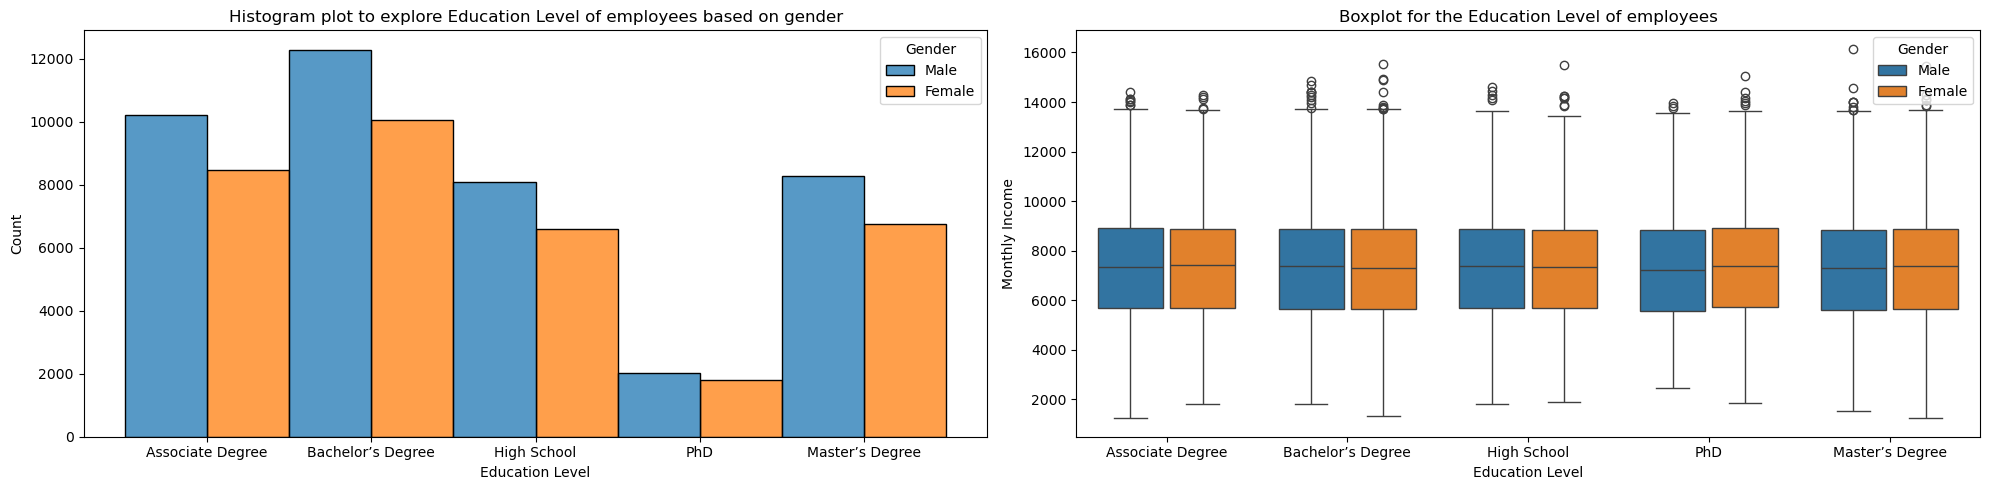

In [22]:
fig, axs= plt.subplots(1, 2, figsize= (20, 5))
sns.histplot(data= employee_df, x= "Education Level", hue= "Gender", legend= True,  multiple="dodge", ax= axs[0])
axs[0].set_title("Histogram plot to explore Education Level of employees based on gender")

sns.boxplot(data= employee_df, x= "Education Level", y="Monthly Income", hue="Gender", gap=0.1, ax= axs[1])
axs[1].set_title("Boxplot for the Education Level of employees")
plt.tight_layout()
plt.show()

In [87]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Education Level'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Education Level  Associate Degree  Bachelor’s Degree  High School  \
Attrition                                                           
Left                         9077              10931         7098   
Stayed                       9572              11400         7582   

Education Level  Master’s Degree   PhD  
Attrition                               
Left                        7332   932  
Stayed                      7689  2885  
Chi-Squared Statistics: 859.31675037543
p value: 1.0861040921224345e-184
Degree of freedom: 4
Expected Frequencies:
[[ 8854.13205724 10602.26408763  6969.73878493  7131.63803055
   1812.22703965]
 [ 9794.86794276 11728.73591237  7710.26121507  7889.36196945
   2004.77296035]]


Education level is significant.

### Marital Status 

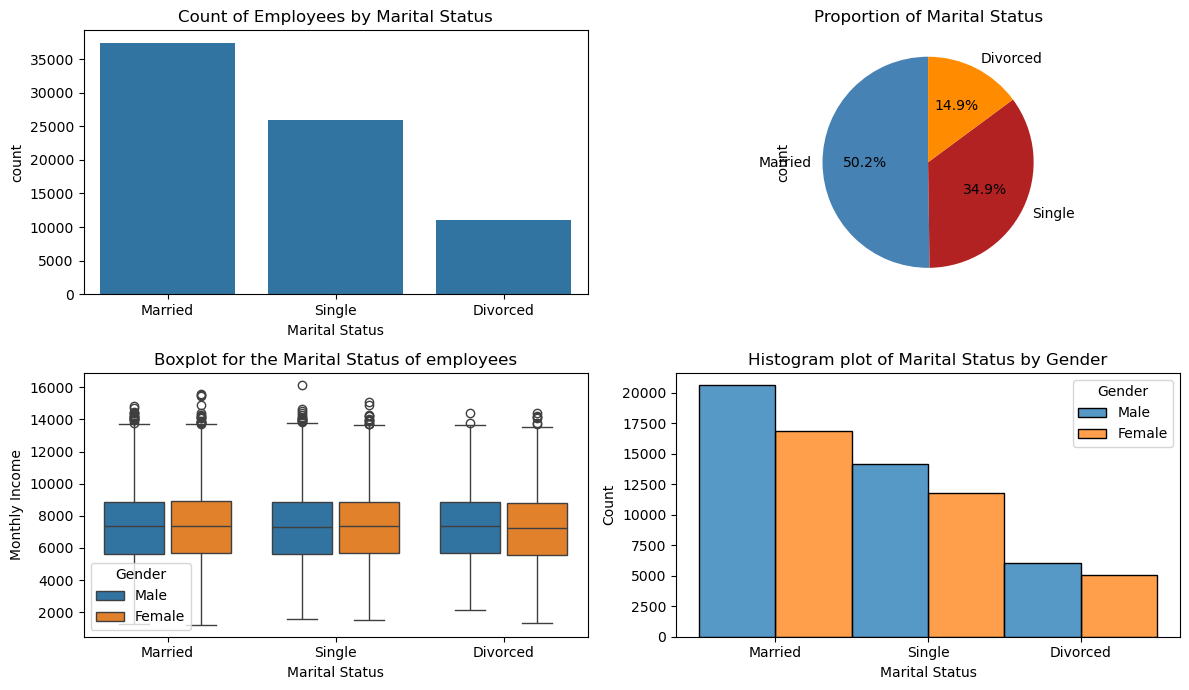

In [23]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Marital Status", ax=axs[0,0])
axs[0,0].set_title("Count of Employees by Marital Status")

employee_df['Marital Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['steelblue', 'firebrick', 'darkorange'], ax=axs[0,1])
axs[0,1].set_title("Proportion of Marital Status")

sns.boxplot(data= employee_df, x= "Marital Status", y = "Monthly Income", hue="Gender", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for the Marital Status of employees")

sns.histplot(data=employee_df, x="Marital Status", hue="Gender", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Marital Status by Gender")

plt.tight_layout()
plt.show()

In [88]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Marital Status'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Marital Status  Divorced  Married  Single
Attrition                                
Left                4521    13485   17364
Stayed              6557    23934    8637
Chi-Squared Statistics: 6046.959578018471
p value: 0.0
Degree of freedom: 2
Expected Frequencies:
[[ 5259.58898225 17765.71223389 12344.69878386]
 [ 5818.41101775 19653.28776611 13656.30121614]]


Marital Status is Significant

### Number of Dependents

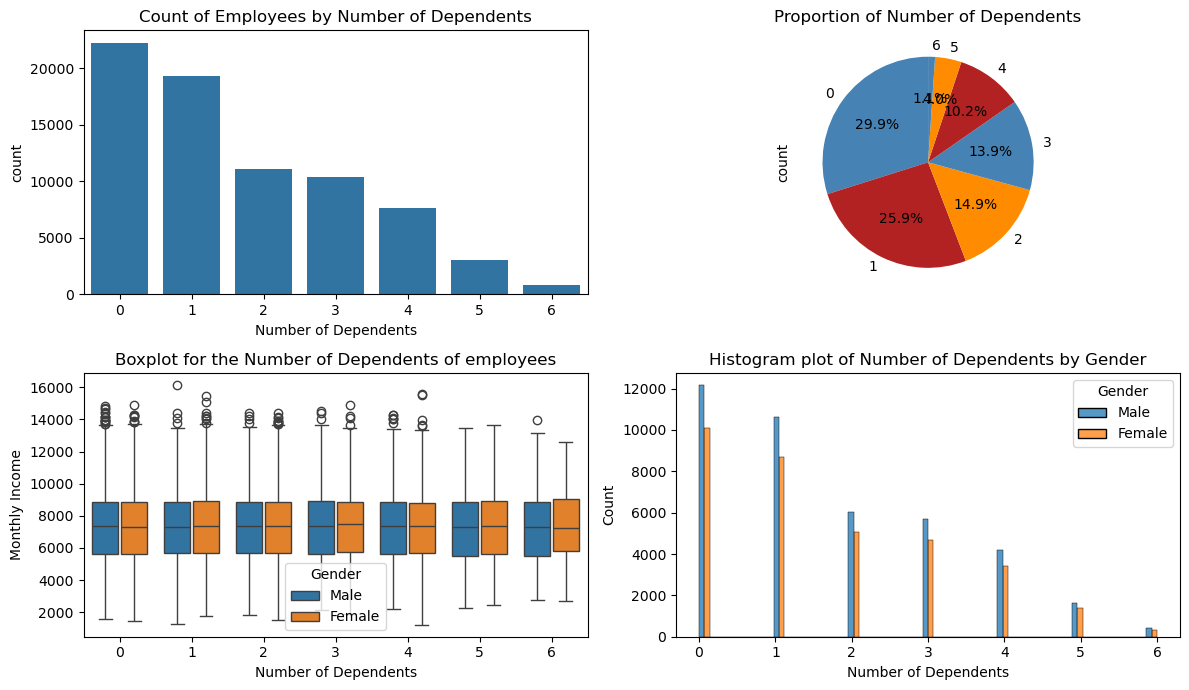

In [24]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Number of Dependents", ax=axs[0,0])
axs[0,0].set_title("Count of Employees by Number of Dependents")

employee_df['Number of Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['steelblue', 'firebrick', 'darkorange'], ax=axs[0,1])
axs[0,1].set_title("Proportion of Number of Dependents")

sns.boxplot(data= employee_df, x= "Number of Dependents", y = "Monthly Income", hue="Gender", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for the Number of Dependents of employees")

sns.histplot(data=employee_df, x="Number of Dependents", hue="Gender", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Number of Dependents by Gender")

plt.tight_layout()
plt.show()

In [89]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Number of Dependents'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Number of Dependents      0     1     2     3     4     5    6
Attrition                                                     
Left                  11009  9573  5554  5191  2702  1048  293
Stayed                11249  9758  5563  5184  4918  1958  498
Chi-Squared Statistics: 789.8648846637041
p value: 2.3836062922744996e-167
Degree of freedom: 6
Expected Frequencies:
[[10567.60530484  9177.93054847  5278.10531826  4925.82015625
   3617.80718945  1427.18220623   375.54927649]
 [11690.39469516 10153.06945153  5838.89468174  5449.17984375
   4002.19281055  1578.81779377   415.45072351]]


Number of Dependents is significant on Attrition.

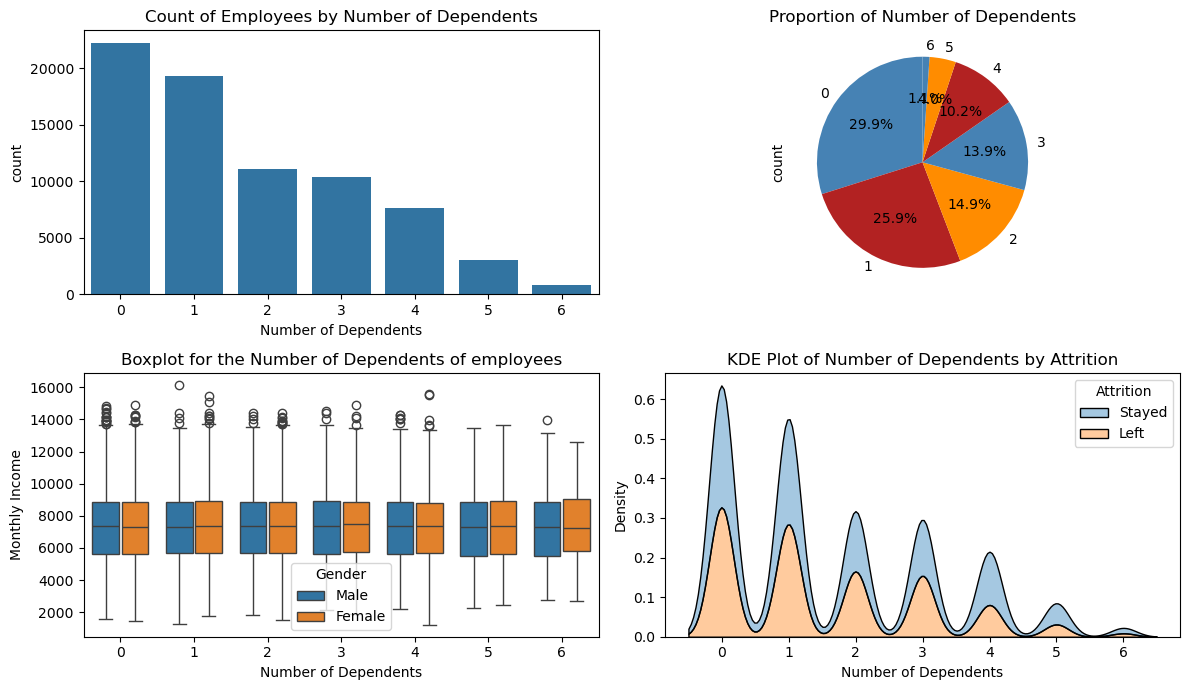

In [25]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Number of Dependents", ax=axs[0,0])
axs[0,0].set_title("Count of Employees by Number of Dependents")

employee_df['Number of Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['steelblue', 'firebrick', 'darkorange'], ax=axs[0,1])
axs[0,1].set_title("Proportion of Number of Dependents")

sns.boxplot(data= employee_df, x= "Number of Dependents", y = "Monthly Income", hue="Gender", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for the Number of Dependents of employees")

sns.kdeplot(data=employee_df, x="Number of Dependents", hue="Attrition", fill=True, multiple="stack", alpha=0.4, ax=axs[1,1])
axs[1,1].set_title("KDE Plot of Number of Dependents by Attrition")

plt.tight_layout()
plt.show()

### Job Level

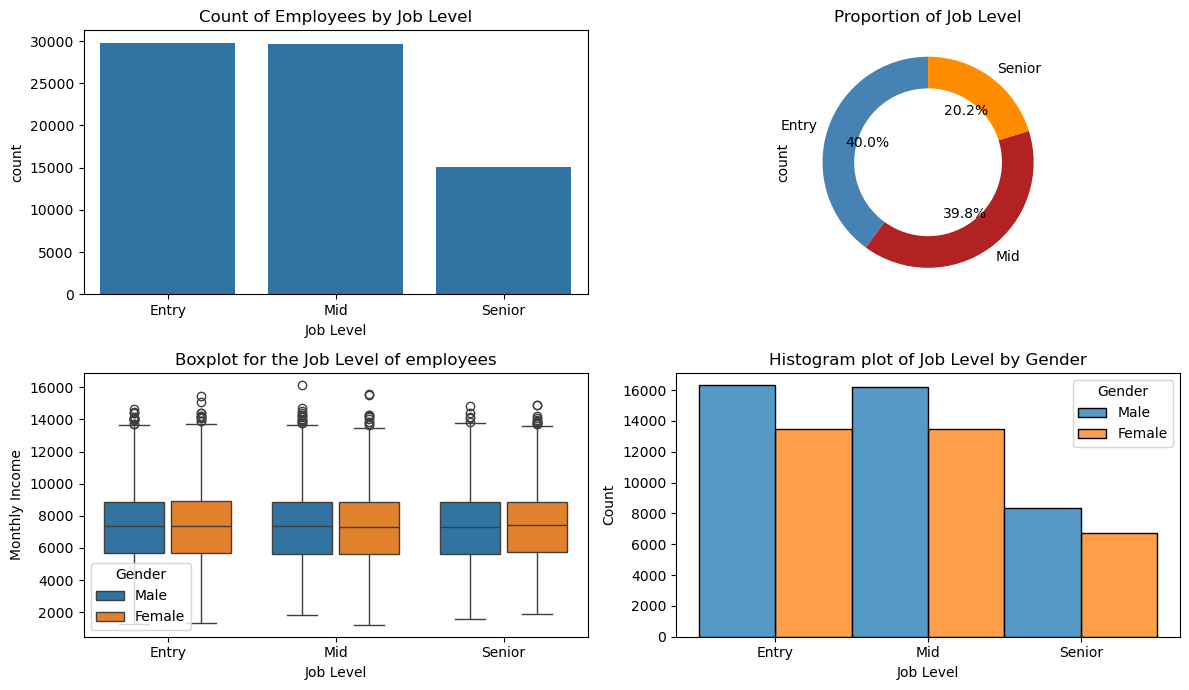

In [26]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Job Level", ax=axs[0,0])
axs[0,0].set_title("Count of Employees by Job Level")

employee_df['Job Level'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.3), autopct='%1.1f%%', startangle=90, colors=['steelblue', 'firebrick', 'darkorange'], ax=axs[0,1])
axs[0,1].set_title("Proportion of Job Level")

sns.boxplot(data= employee_df, x= "Job Level", y = "Monthly Income", hue="Gender", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for the Job Level of employees")

sns.histplot(data=employee_df, x="Job Level", hue="Gender", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Job Level by Gender")

plt.tight_layout()
plt.show()

In [90]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Job Level'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Job Level  Entry    Mid  Senior
Attrition                      
Left       18843  13479    3048
Stayed     10937  16199   11992
Chi-Squared Statistics: 7496.50705041532
p value: 0.0
Degree of freedom: 2
Expected Frequencies:
[[14138.88426535 14090.45692502  7140.65880963]
 [15641.11573465 15587.54307498  7899.34119037]]


Job Level is Significant.

### Company Size

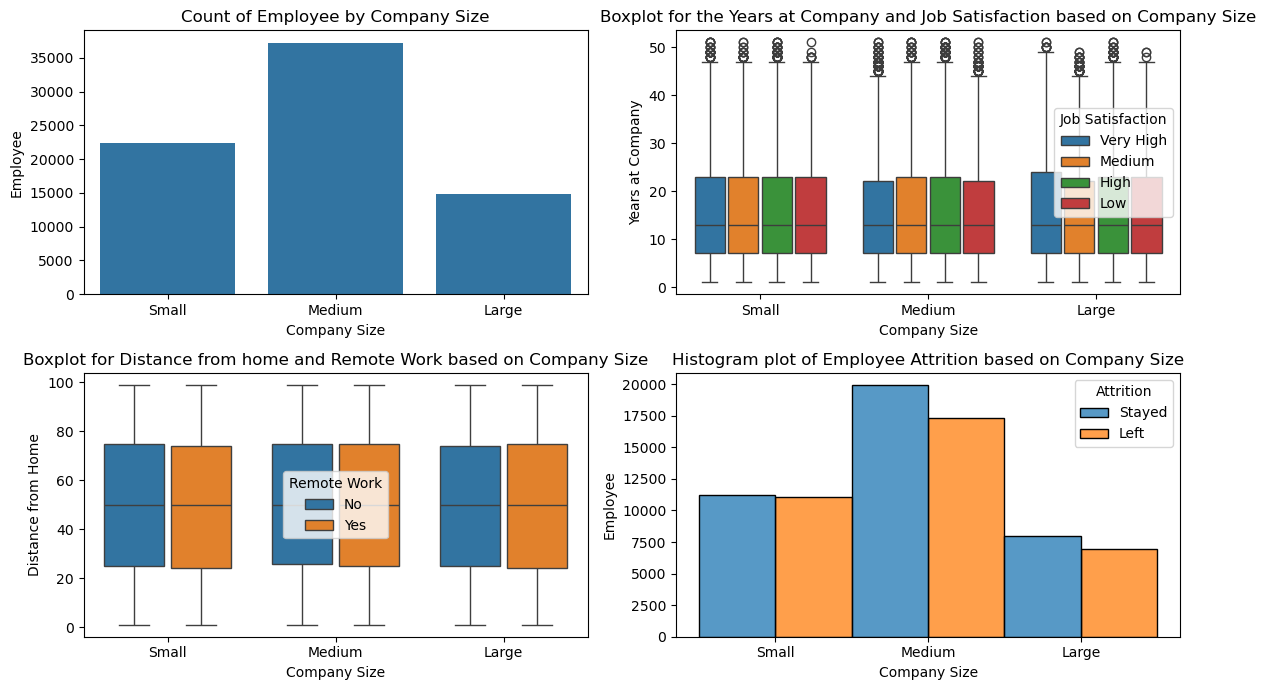

In [27]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Company Size", ax=axs[0,0])
axs[0,0].set_title("Count of Employee by Company Size")
axs[0,0].set_ylabel("Employee")

sns.boxplot(data= employee_df, x= "Company Size", y = "Years at Company", hue="Job Satisfaction", gap=0.1, ax= axs[0, 1])
axs[0,1].set_title("Boxplot for the Years at Company and Job Satisfaction based on Company Size")

sns.boxplot(data= employee_df, x= "Company Size", y = "Distance from Home", hue="Remote Work", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for Distance from home and Remote Work based on Company Size")

sns.histplot(data=employee_df, x="Company Size", hue="Attrition", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Employee Attrition based on Company Size")
axs[1,1].set_ylabel("Employee")

plt.tight_layout()
plt.show()

In [91]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Company Size'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Company Size  Large  Medium  Small
Attrition                         
Left           6942   17324  11104
Stayed         7970   19907  11251
Chi-Squared Statistics: 61.62427885060923
p value: 4.153917548729049e-14
Degree of freedom: 2
Expected Frequencies:
[[ 7079.8872453  17676.45399877 10613.65875594]
 [ 7832.1127547  19554.54600123 11741.34124406]]


Company SIze is singnificant.

### Remote Work    

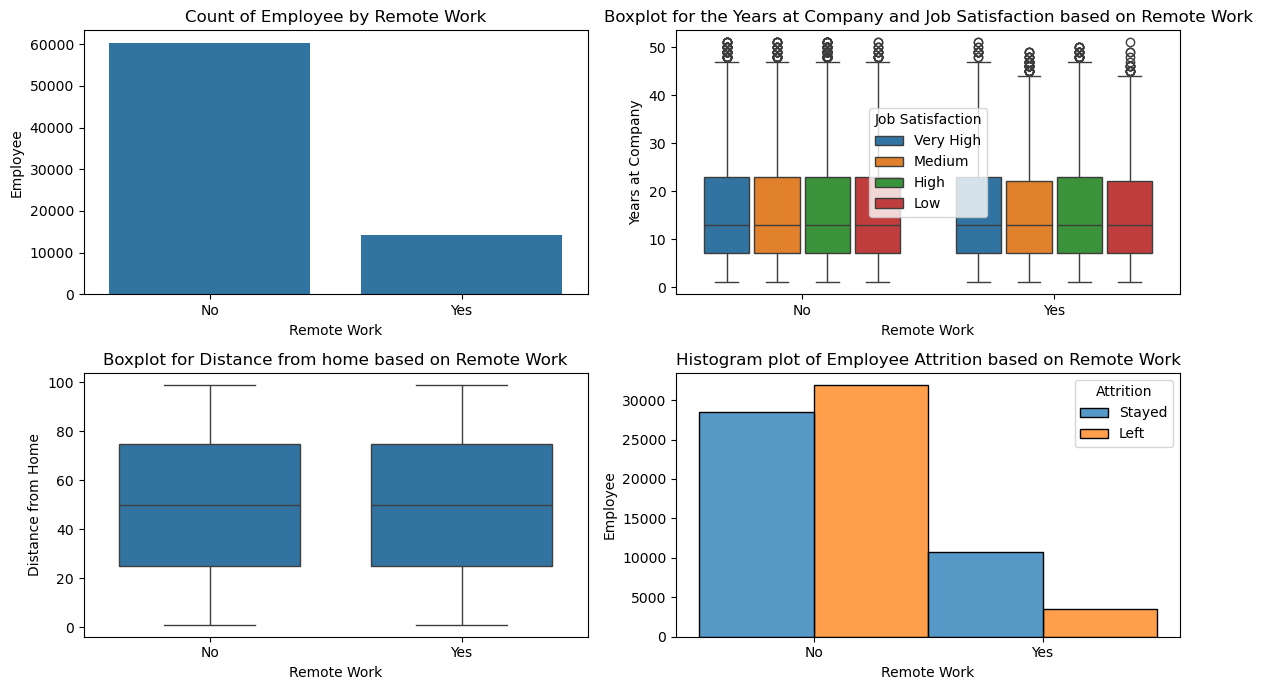

In [28]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Remote Work", ax=axs[0,0])
axs[0,0].set_title("Count of Employee by Remote Work")
axs[0,0].set_ylabel("Employee")

sns.boxplot(data= employee_df, x= "Remote Work", y = "Years at Company", hue="Job Satisfaction", gap=0.1, ax= axs[0, 1])
axs[0,1].set_title("Boxplot for the Years at Company and Job Satisfaction based on Remote Work")

sns.boxplot(data= employee_df, x= "Remote Work", y = "Distance from Home", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for Distance from home based on Remote Work")

sns.histplot(data=employee_df, x="Remote Work", hue="Attrition", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Employee Attrition based on Remote Work")
axs[1,1].set_ylabel("Employee")

plt.tight_layout()
plt.show()

In [92]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Remote Work'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Remote Work     No    Yes
Attrition                
Left         31861   3509
Stayed       28439  10689
Chi-Squared Statistics: 3643.736614512233
p value: 0.0
Degree of freedom: 1
Expected Frequencies:
[[28629.10413702  6740.89586298]
 [31670.89586298  7457.10413702]]


Remote Work is Significant.

### Leadership Opportunities

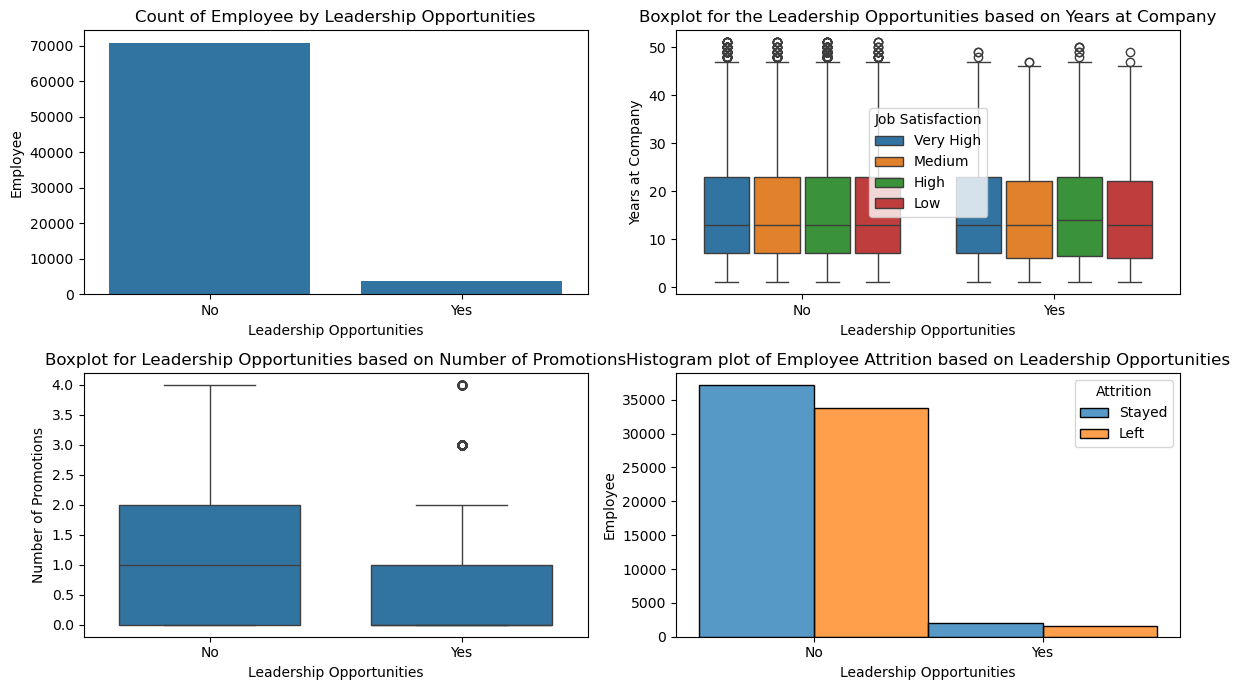

In [29]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Leadership Opportunities", ax=axs[0,0])
axs[0,0].set_title("Count of Employee by Leadership Opportunities")
axs[0,0].set_ylabel("Employee")

sns.boxplot(data= employee_df, x= "Leadership Opportunities", y = "Years at Company", hue="Job Satisfaction", gap=0.1, ax= axs[0, 1])
axs[0,1].set_title("Boxplot for the Leadership Opportunities based on Years at Company")

sns.boxplot(data= employee_df, x= "Leadership Opportunities", y = "Number of Promotions", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for Leadership Opportunities based on Number of Promotions")

sns.histplot(data=employee_df, x="Leadership Opportunities", hue="Attrition", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Employee Attrition based on Leadership Opportunities")
axs[1,1].set_ylabel("Employee")

plt.tight_layout()
plt.show()

In [93]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Leadership Opportunities'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Leadership Opportunities     No   Yes
Attrition                            
Left                      33732  1638
Stayed                    37113  2015
Chi-Squared Statistics: 10.608612122654058
p value: 0.001125621467070695
Degree of freedom: 1
Expected Frequencies:
[[33635.63652716  1734.36347284]
 [37209.36347284  1918.63652716]]


Leadership Opportunities is significant.

### Innovation Opportunities

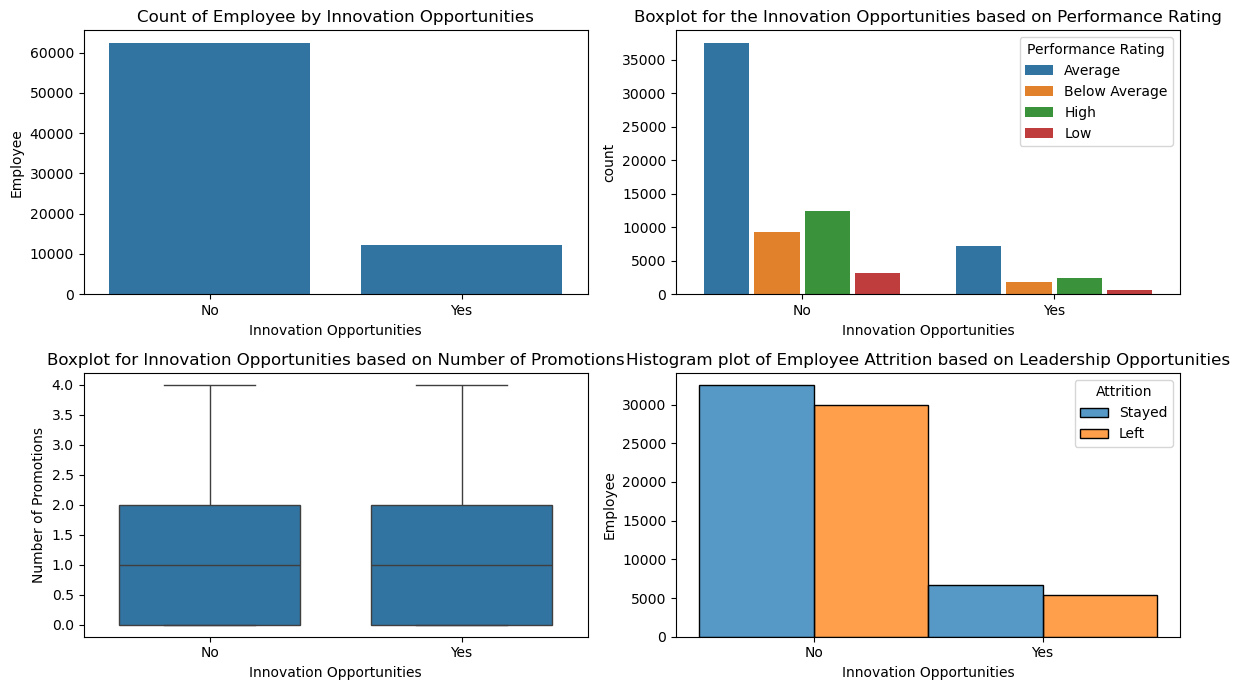

In [30]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Innovation Opportunities", ax=axs[0,0])
axs[0,0].set_title("Count of Employee by Innovation Opportunities")
axs[0,0].set_ylabel("Employee")

sns.countplot(data=employee_df, x="Innovation Opportunities", hue="Performance Rating", gap=0.1, ax= axs[0, 1])
axs[0,1].set_title("Boxplot for the Innovation Opportunities based on Performance Rating")

sns.boxplot(data= employee_df, x= "Innovation Opportunities", y = "Number of Promotions", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for Innovation Opportunities based on Number of Promotions")

sns.histplot(data=employee_df, x="Innovation Opportunities", hue="Attrition", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Employee Attrition based on Leadership Opportunities")
axs[1,1].set_ylabel("Employee")

plt.tight_layout()
plt.show()

In [94]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Innovation Opportunities'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Innovation Opportunities     No   Yes
Attrition                            
Left                      29919  5451
Stayed                    32475  6653
Chi-Squared Statistics: 34.475026963904824
p value: 4.317554065887777e-09
Degree of freedom: 1
Expected Frequencies:
[[29623.28894735  5746.71105265]
 [32770.71105265  6357.28894735]]


Innovation Opportunities is significant.

### Company Reputation 

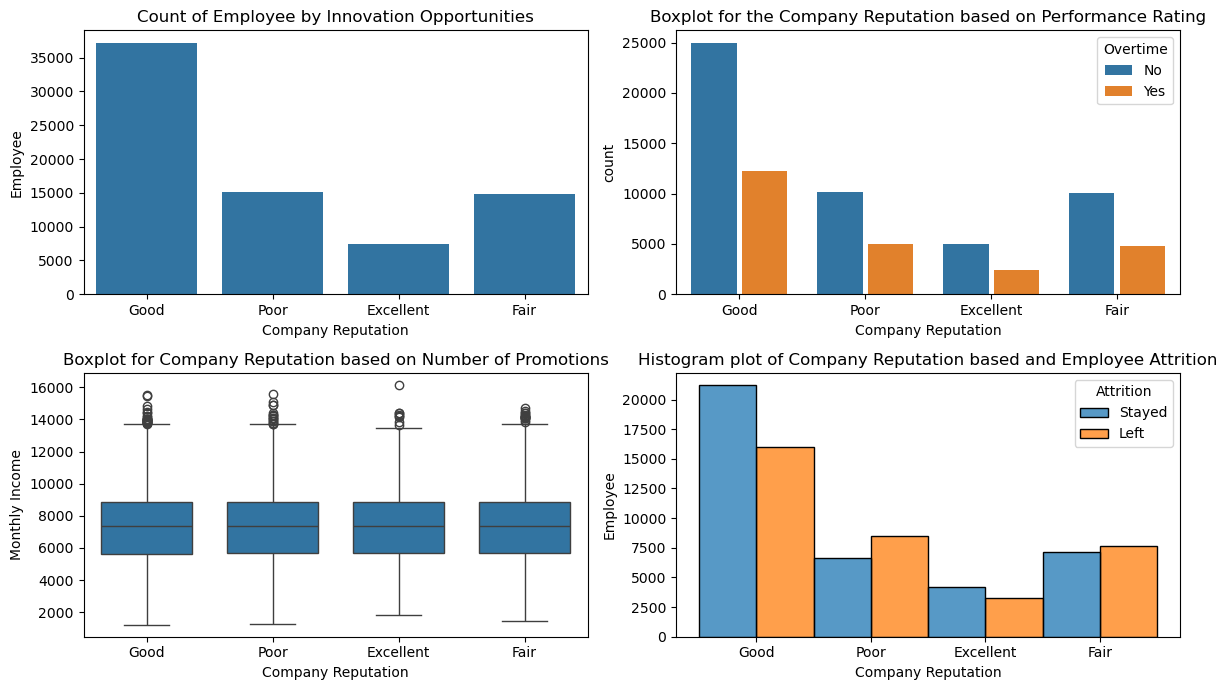

In [31]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Company Reputation", ax=axs[0,0])
axs[0,0].set_title("Count of Employee by Innovation Opportunities")
axs[0,0].set_ylabel("Employee")

sns.countplot(data=employee_df, x="Company Reputation", hue="Overtime", gap=0.1, ax= axs[0, 1])
axs[0,1].set_title("Boxplot for the Company Reputation based on Performance Rating")

sns.boxplot(data= employee_df, x= "Company Reputation", y = "Monthly Income", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for Company Reputation based on Number of Promotions")

sns.histplot(data=employee_df, x="Company Reputation", hue="Attrition", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Company Reputation based and Employee Attrition")
axs[1,1].set_ylabel("Employee")

plt.tight_layout()
plt.show()

In [95]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Company Reputation'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Company Reputation  Excellent  Fair   Good  Poor
Attrition                                       
Left                     3259  7655  15988  8468
Stayed                   4155  7131  21194  6648
Chi-Squared Statistics: 887.5875124479621
p value: 4.358677086923224e-192
Degree of freedom: 3
Expected Frequencies:
[[ 3520.0029531   7020.06523665 17653.18988429  7176.74192596]
 [ 3893.9970469   7765.93476335 19528.81011571  7939.25807404]]


Company Reputation is significant.

In [32]:
employee_df.head(5)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,1,56,Male,41,Education,5209,Fair,Very High,Average,0,No,98,Associate Degree,Married,0,Entry,Small,86,No,No,No,Good,Low,Stayed
1,2,46,Female,22,Technology,9099,Fair,Medium,Average,0,No,13,Bachelor’s Degree,Married,0,Entry,Medium,93,No,No,No,Good,High,Left
2,3,32,Male,16,Education,4239,Good,High,Below Average,0,No,54,High School,Single,0,Mid,Small,56,No,No,No,Poor,Low,Stayed
3,4,25,Female,17,Finance,6834,Fair,High,Average,0,Yes,62,PhD,Single,2,Entry,Medium,26,No,No,No,Poor,High,Left
4,5,38,Female,2,Finance,12176,Fair,Very High,Below Average,0,No,75,Bachelor’s Degree,Married,5,Entry,Small,66,No,No,No,Good,Medium,Left


### Employee Recognition  

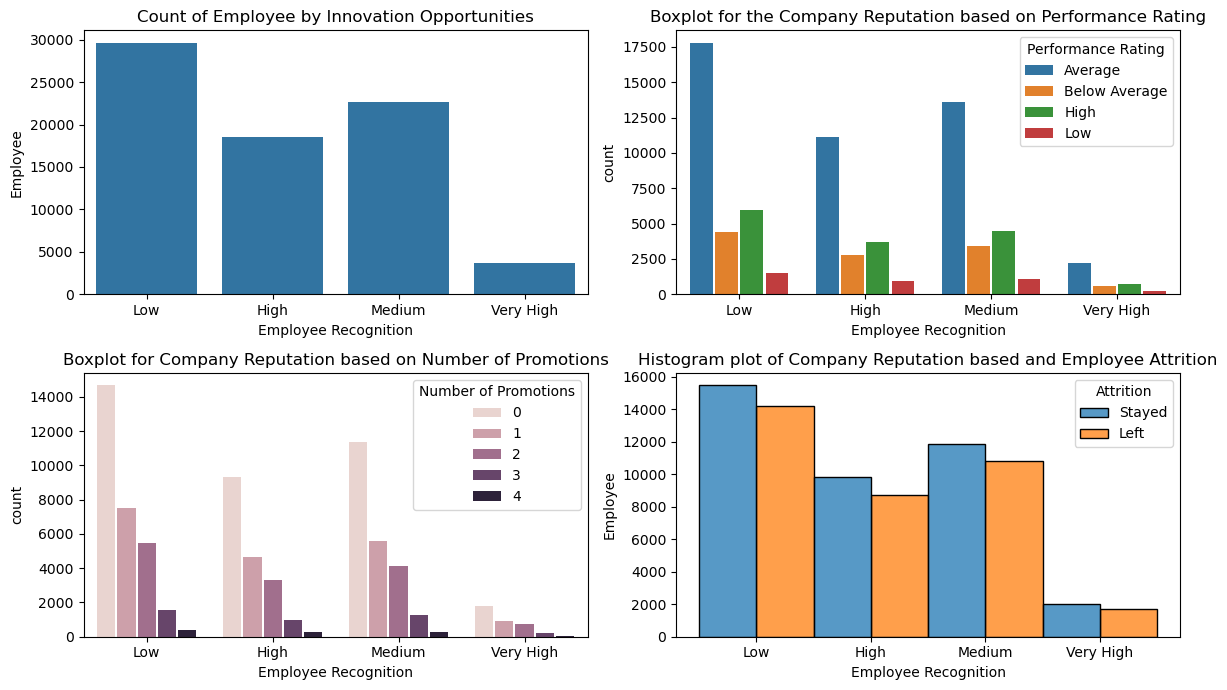

In [33]:
fig, axs= plt.subplots(2, 2, figsize= (12, 7))

sns.countplot(data=employee_df, x="Employee Recognition", ax=axs[0,0])
axs[0,0].set_title("Count of Employee by Innovation Opportunities")
axs[0,0].set_ylabel("Employee")

sns.countplot(data=employee_df, x="Employee Recognition", hue="Performance Rating", gap=0.1, ax= axs[0, 1])
axs[0,1].set_title("Boxplot for the Company Reputation based on Performance Rating")

sns.countplot(data= employee_df, x= "Employee Recognition", hue = "Number of Promotions", gap=0.1, ax= axs[1, 0])
axs[1,0].set_title("Boxplot for Company Reputation based on Number of Promotions")

sns.histplot(data=employee_df, x="Employee Recognition", hue="Attrition", multiple="dodge", ax=axs[1,1])
axs[1,1].set_title("Histogram plot of Company Reputation based and Employee Attrition")
axs[1,1].set_ylabel("Employee")

plt.tight_layout()
plt.show()

In [96]:
# Chi-square test for Attrition and Work-life balance as both are categorical records. 

cross_tab= pd.crosstab(employee_df['Attrition'], employee_df['Employee Recognition'])
print(cross_tab)
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-Squared Statistics: {chi2}')
print(f'p value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected Frequencies:\n{expected}')


Employee Recognition  High    Low  Medium  Very High
Attrition                                           
Left                  8734  14163   10784       1689
Stayed                9816  15457   11873       1982
Chi-Squared Statistics: 5.815577842262536
p value: 0.12093574263697701
Degree of freedom: 3
Expected Frequencies:
[[ 8807.12905044 14062.91980993 10757.04166555  1742.90947408]
 [ 9742.87094956 15557.08019007 11899.95833445  1928.09052592]]


Employment Recognition is not significant.

### Attrition
Attrition vs other categorical variables

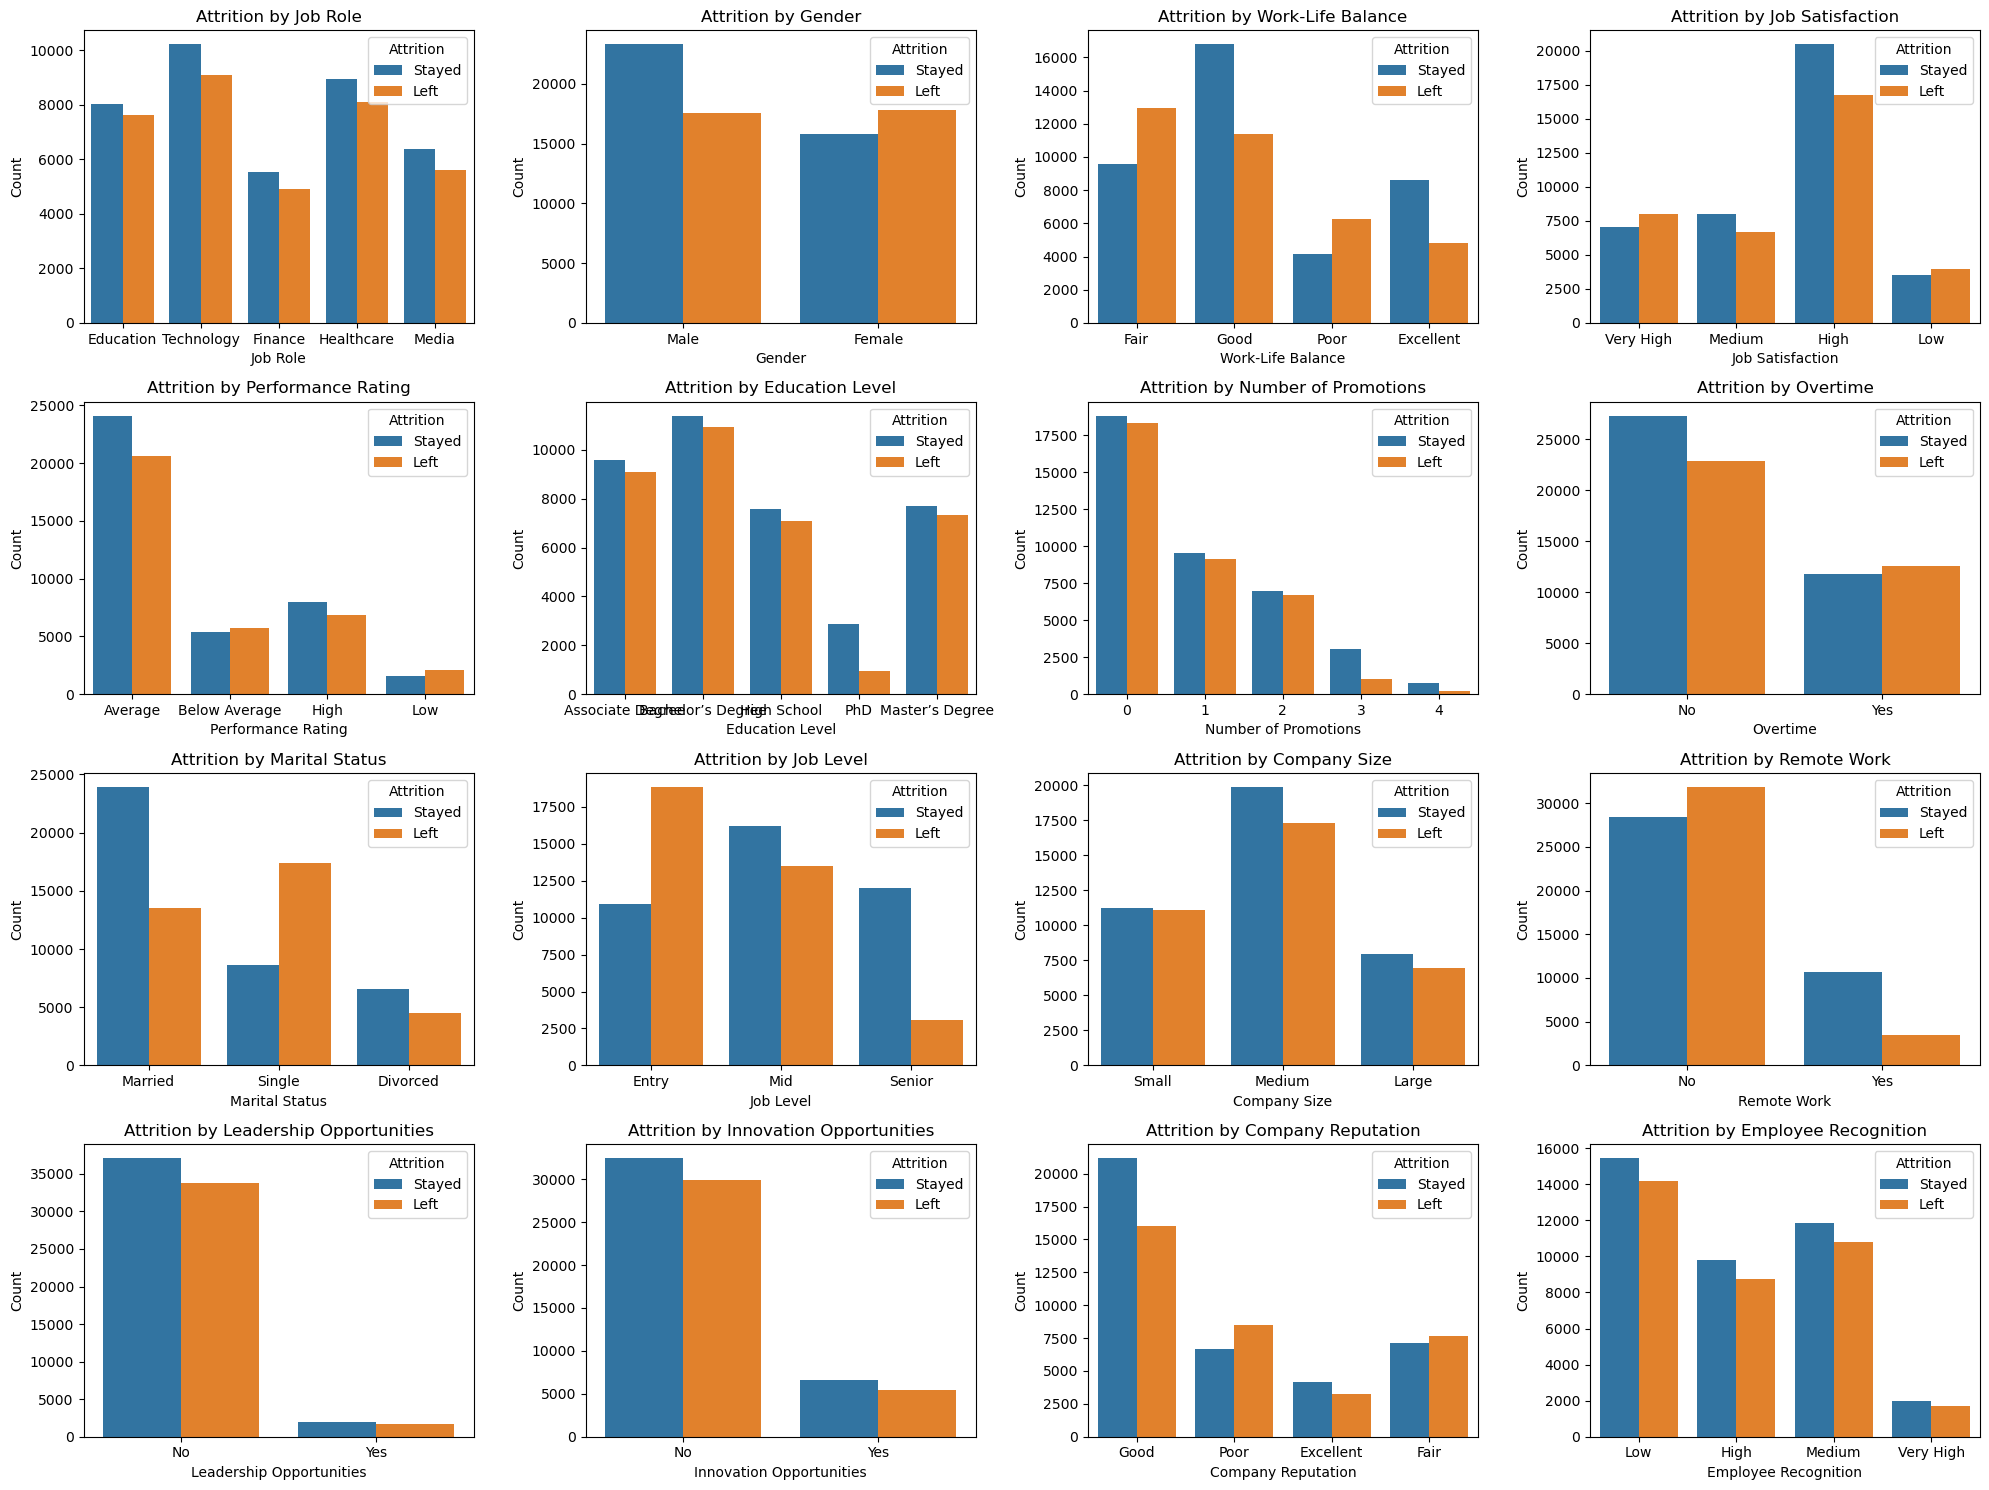

In [34]:

fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()
feature_list = ["Job Role", "Gender", "Work-Life Balance", 
                "Job Satisfaction", "Performance Rating", "Education Level", 
                "Number of Promotions", "Overtime", "Marital Status", 
                "Job Level", "Company Size", "Remote Work", 
                "Leadership Opportunities", "Innovation Opportunities", "Company Reputation", 
                "Employee Recognition"]
for i, feature in enumerate(feature_list):
    sns.countplot(data=employee_df, x=feature, hue="Attrition", ax=axs[i])
    axs[i].set_title(f"Attrition by {feature}")
    axs[i].set_xlabel(f"{feature}")
    axs[i].set_ylabel("Count")

plt.tight_layout()    
plt.show()


**Summmary:**
The above plot shows the relation between the **Attrition** variable with other categorical varaible are as follows. 

**Attrition by Job Role:** Employees in technology roles had the highest retention, while employees in finance and healthcare roles showed higher attrition rates.

**Attrition by Gender:** Male employees were more likely to stay, while female employees had a higher attrition rate.

**Attrition by Work-Life Balance:** Employees with a "Fair" or "Good" work-life balance were more likely to stay, whereas those with a "Poor" work-life balance had higher attrition.

**Attrition by Job Satisfaction:** Employees with "Very High" or "High" job satisfaction were more likely to stay, while those with "Low" satisfaction had higher attrition.

**Attrition by Performance Rating:** Employees with "Average" and "Below Average" performance ratings had higher attrition rates compared to those with "High" performance ratings.

**Attrition by Education Level:** Employees with associate or bachelor's degrees had a higher likelihood of staying, whereas those with high school or master's degrees showed more attrition.

**Attrition by Number of Promotions:** Employees with fewer promotions (0 or 1) were more likely to leave compared to those with multiple promotions.

**Attrition by Overtime:** Employees who worked overtime were more likely to leave, while those who did not work overtime had higher retention.

**Attrition by Marital Status:** Married employees were more likely to stay, while single employees showed higher attrition.

**Attrition by Job Level:** Employees at entry and mid-level positions experienced higher attrition, while senior-level employees had better retention.

**Attrition by Company Size:** Employees in small and medium-sized companies had higher attrition compared to those in large companies.

**Attrition by Remote Work:** Employees who had the option to work remotely were more likely to stay, while those without remote work options experienced higher attrition.

**Attrition by Leadership Opportunities:** Employees without leadership opportunities had higher attrition compared to those with such opportunities.

**Attrition by Innovation Opportunities:** Employees with access to innovation opportunities were more likely to stay, whereas those without these opportunities had higher attrition.

**Attrition by Company Reputation:** Employees at companies with excellent or good reputations had better retention, while those at companies with poor reputations were more likely to leave.

**Attrition by Employee Recognition:** Employees with "High" or "Medium" levels of recognition were more likely to stay, while those with "Low" recognition had higher attrition.

Chi-square test analysis:         
 Age                       => Significant\
 Gender                    => Significant\
 Years at Company          => Significant\
 Job Role                  => Not Significant\
 Monthly Income            => Significant\
 Work-Life Balance         => Significant\
 Job Satisfaction          => Significant\
 Performance Rating        => Significant\
 Number of Promotions      => Significant\
 Overtime                  => Significant\
 Distance from Home        => Significant\
 Education Level           => Significant\
 Marital Status            => Significant\
 Number of Dependents      => Significant\
 Job Level                 => Significant\
 Company Size              => Significant\
 Company Tenure            => Significant\
 Remote Work               => Significant\
 Leadership Opportunities  => Significant\
 Innovation Opportunities  => Significant\
 Company Reputation        => Significant\
 Employee Recognition      => Not Significant

### Train Validation and Test Split

In [36]:
employee_df.shape

(74498, 24)

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(train_df.drop(columns= ["Attrition"]), train_df["Attrition"], test_size= 0.2, random_state= 42)